In [16]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns 
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Linear functions provide the basis for many learning algorithms. Linear regression is the problem of fitting a linear function to a set of input-output pairs given a set of training examples, in which the input and output features are numeric.

General equation of line: y = ax + b

In [2]:
# Cargamos datos
url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
# Load in the data
data = pd.read_csv(url, header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


''

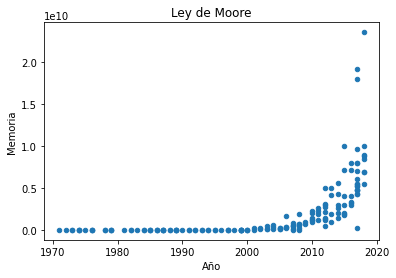

In [3]:
# Exploracion gráfica simple 
ax = data.plot(
    kind='scatter', 
    x=0, y=1, 
    title='Ley de Moore')
ax.set_xlabel('Año')
ax.set_ylabel('Memoria')
;

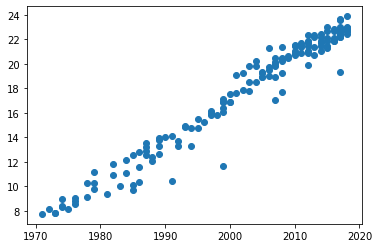

In [4]:
# tratamos los datos como matrices 
X = data.loc[:,0]  # todas las filas de la columna 0 (Año)
Y = data.loc[:,1]  # todas las filas de la columna 1 (memoria)

# Queremos realizar una regresión lineal por lo que la relación debe ser lineal
# para ello sacamos el logaritmo de Y 
Y = np.log(Y)
plt.scatter(X, Y)
# la grafica lo muestra mejor. 


In [5]:
# Podemos centrar los datos a la media, esto nos ayudará a quitar extremos
# usualmente se lo podría normalizar (scale it), pero luego lo tendríamos que 
# transformar nuevamente. Para este caso tan simple, con esto nos basta. 
X = X - X.mean()
X = X.values.reshape(-1, 1) # el modelo necesita matrices de 2D, en vez de 1. 

In [6]:
X[:4]

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086]])

In [7]:
X.shape

(162, 1)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)
# sacamos la pendiente (slope)
a = lm.coef_[0]
# print intercept and coefficients
print(f'Intercept : {lm.intercept_}')
print(f'Pendiente (coef) {a}')


Intercept : 17.764939393631764
Pendiente (coef) 0.3416824873873135


Our original model for exponential growth is:

C=A0rt 


Where  C  is transistor the count and  t  is the year.

r  is the rate of growth. For example, when  t  goes from 1 to 2,  C  increases by a factor of  r . When  t  goes from 2 to 3,  C  increases by a factor of  r  again.

When we take the log of both sides, we get:

logC=logr∗t+logA0 

This is our linear equation:

y^=ax+b 

Where:

y^=logC 
a=logr 
x=t 
b=logA0 

We are interested in  r , because that's the rate of growth. Given our regression weights, we know that:

a=0.34188038 

so that:

r=e0.34188038=1.4076 

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for  C  to increase to  2C .

Let's call the original starting time  t , to correspond with the initial transistor count  C .

Let's call the end time  t′ , to correspond with the final transistor count  2C .

Then we also have:

2C=A0rt′ 

Combine this with our original equation:

C=A0rt 

We get (by dividing the 2 equations):

2C/C=(A0rt′)/A0rt 

Which simplifies to:

2=r(t′−t) 

Solve for  t′−t :

t′−t=log2logr=log2a 

Important note! We haven't specified what the starting time  t  actually is, and we don't have to since we just proved that this holds for any  t .


In [9]:
print("Tiempo en duplicar capacidad:", round(np.log(2) / a, 2))

Tiempo en duplicar capacidad: 2.03


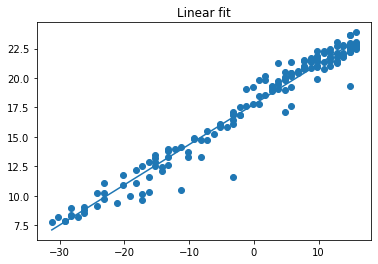

In [10]:
# Make sure the line fits our data
Yhat = lm.predict(X).flatten()
fig = plt.figure()
plt.title('Linear fit')
plt.scatter(X, Y)
plt.plot(X, Yhat);

# Segundo caso de uso (Marketing Mix Models) 






In [12]:
# read data into a DataFrame
url = 'https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
data = pd.read_csv(url, index_col=0)
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


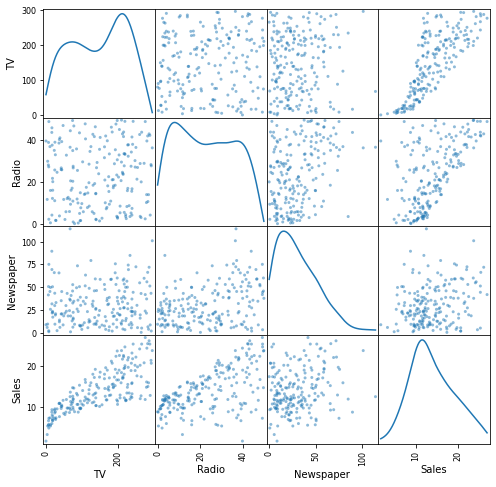

In [13]:
scatter_matrix(data,figsize=(8, 8), diagonal='kde')
plt.show()

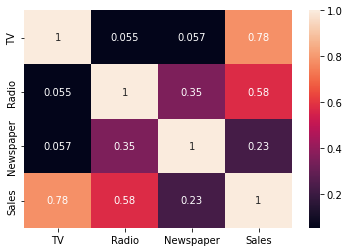

In [14]:
sns.heatmap(data.corr(), annot=True)

In [17]:
# create a fitted model with all three features
lm = sm.ols(formula='Sales ~ 1 + TV + Radio + Newspaper', data=data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        14:57:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Using SKlearn 

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coeficientes: {lm.coef_}")

Intercept: 2.938889369459412
Coeficientes: [ 0.04576465  0.18853002 -0.00103749]


In [20]:
lm.predict([[147,23,30]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.97135785])

In [22]:
lm.score(X, y)

0.8972106381789522

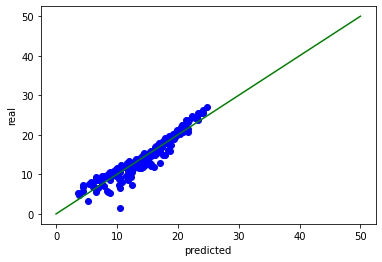

In [23]:
p = lm.predict(X)
plt.plot(p, y,'bo')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


https://towardsdatascience.com/introduction-to-marketing-mix-modeling-in-python-d0dd81f4e794

In [ ]:
weights = pd.Series(
    lr.coef_,
    index=X.columns
)
base = lr.intercept_
unadj_contributions = X.mul(weights).assign(Base=base)
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day
ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

In [ ]:
sales_from_tv = adj_contributions['TV'].sum()
spendings_on_tv = data['TV'].sum()
tv_roi = sales_from_tv / spendings_on_tv
# tv_roi is around 0.36 - anything less than 1 is poor. 